In [32]:
# import librairies
import numpy as np 
import pandas as pd
import time
from py2neo import Graph

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(15,8))

/var/folders/fj/h7lnf8693gz7jj88kkv0_l5r0000gp/T/ipykernel_2873/86783070.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

In [118]:
df_country = pd.read_csv("data/country.csv",sep="|")
df_country['iso_alpha_2'] = df_country['iso_alpha_2'].str.lower()
df_country.head()

,country,domain,iso_alpha_2,iso_alpha_3,Lat,Lon,continent_m49_code,continent_name,sub_continent_m49_code,sub_continent_name
0,Burkina Faso,Burkina Faso,bf,BFA,12.075308,-1.688031,2,AFRICA,11,WESTERN_AFRICA
1,Guinea-Bissau,Guinea Bissau,gw,GNB,12.100035,-14.900021,2,AFRICA,11,WESTERN_AFRICA
2,Mauritania,Mauritania,mr,MRT,20.254038,-9.239926,2,AFRICA,11,WESTERN_AFRICA
3,Senegal,Senegal,sn,SEN,14.475061,-14.452961,2,AFRICA,11,WESTERN_AFRICA
4,Liberia,Liberia,lr,LBR,5.749972,-9.365852,2,AFRICA,11,WESTERN_AFRICA


In [3]:
df_port = pd.read_csv('/Users/amanda.putra/Documents/01-WORK/UN Big Data Hackathon 2022/neo4j/data/ports_baltic_black.csv')
df_port

,Unnamed: 0,name,port_id,lat_port,lon_port,iso2,area,h3_5,h3_5_int
0,119,Agnesberg,2321,57.7856,12.00760,se,baltic,851f25abfffffff,599526696999190527
1,714,Agnesberg,2321,57.7856,12.00760,se,baltic,851f2533fffffff,599526696999190527
2,715,Agnesberg,2321,57.7856,12.00760,se,baltic,851f25affffffff,599526696999190527
3,716,Agnesberg,2321,57.7856,12.00760,se,baltic,851f2517fffffff,599526696999190527
4,717,Agnesberg,2321,57.7856,12.00760,se,baltic,851f25bbfffffff,599526696999190527
...,...,...,...,...,...,...,...,...,...
2613,1549,Zouq,wfp.17240,33.9698,35.60259,lb,black,852da26bfffffff,599781564653502463
2614,1550,Zouq,wfp.17240,33.9698,35.60259,lb,black,852db1b7fffffff,599781564653502463
2615,1551,Zouq,wfp.17240,33.9698,35.60259,lb,black,852da273fffffff,599781564653502463
2616,1552,Zouq,wfp.17240,33.9698,35.60259,lb,black,852da247fffffff,599781564653502463


In [5]:
df = pd.read_csv("/Users/amanda.putra/Documents/01-WORK/UN Big Data Hackathon 2022/neo4j/data/result_ais_02.csv")
df

,Unnamed: 0,id_shipping,mmsi,vessel_name,vessel_type,vessel_type_main,vessel_type_sub,vessel_type_code,vessel_type_cargo,vessel_class,...,movements,origin_port_id,origin_port_name,origin_country_iso2,destination_port_id,destination_port_name,destination_country_iso2,avg_speed,distance,is_imputed_port
0,0,2072612133,207261213,NAJDEN KIROV,Cargo,NaN,NaN,79,No Additional Information,A,...,"[[28.10311167, 45.440645], [28.10311833, 45.44...",wfp.14761,Reni,ua,wfp.14866,Braila,ro,3.483030,43.64,0
1,1,20953100028,209531000,HARUN,Cargo,NaN,NaN,79,No Additional Information,A,...,"[[14.51538667, 55.40483], [13.999365, 55.23487...",350,SIMRISHAMN,se,782598,TRELLEBORG,se,21.270000,21.46,0
2,2,2096280008,209628000,AGIA THALASSINI,Fishing,NaN,NaN,30,NaN,B,...,"[[23.67256167, 37.60286167], [23.62222667, 37....",wfp.17638,Idhra (Hydra),gr,wfp.14332,Eleusis,gr,NaN,NaN,0
3,3,2099890002,209989000,LISA,Cargo,NaN,NaN,70,NaN,A,...,"[[12.53941333, 56.10366833], [12.67947333, 55....",87213,HELSINGBORG,se,4305,KÖPENHAMN,dk,NaN,NaN,0
4,4,21110000067,211100000,ANTONIA B,Cargo,NaN,NaN,70,NaN,A,...,"[[12.34052333, 58.35282], [12.31495833, 58.389...",8092,TROLLHÄTTAN,se,8128,HÖNSÄTER,se,6.142692,13.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29366,29366,62072300031,620723000,ELENA,Cargo,NaN,NaN,70,NaN,A,...,"[[28.98109167, 40.91781], [28.91085667, 40.970...",wfp.17151,Ambarli,tr,wfp.16140,Beykoz,tr,3.799167,29.96,0
29367,29367,63601601724,636016017,HISTRIA AMBRA,Tanker,Oil And Chemical Tanker,Chemical Oil Products Tanker,84,"Carrying DG,HS or MP,IMO hazard or Pollutant C...",A,...,"[[28.52685, 40.80591833], [28.88687167, 40.782...",wfp.17092,Buyukcekmece,tr,wfp.17151,Ambarli,tr,0.340000,1.35,0
29368,29368,63601832611,636018326,MSC MIA SUMMER,Cargo,NaN,NaN,70,NaN,A,...,"[[29.83359667, 31.283325], [29.76595167, 31.22...",wfp.15978,Abu Qir,eg,wfp.16270,Alexandria,eg,0.147500,9.29,0
29369,29369,63601894623,636018946,MIKE BAY,Cargo,NaN,NaN,79,No Additional Information,A,...,"[[26.45276667, 40.2169], [26.86726667, 40.4659]]",wfp.15678,Canakkale,tr,wfp.14975,Gelibolu,tr,NaN,NaN,0


In [123]:
df['mmsi'].value_counts()

219461000    75
219001819    75
271000976    66
230628000    65
276829000    64
             ..
265545780     1
246830000     1
230099960     1
219018937     1
636090886     1
Name: mmsi, Length: 8478, dtype: int64

In [63]:
df.columns

Index(['Unnamed: 0', 'id_shipping', 'mmsi', 'vessel_name', 'vessel_type',
       'vessel_type_main', 'vessel_type_sub', 'vessel_type_code',
       'vessel_type_cargo', 'vessel_class', 'length', 'width', 'flag_country',
       'destination', 'eta', 'source', 'start_time', 'end_time', 'movements',
       'origin_port_id', 'origin_port_name', 'origin_country_iso2',
       'destination_port_id', 'destination_port_name',
       'destination_country_iso2', 'avg_speed', 'distance', 'is_imputed_port'],
      dtype='object')

In [7]:
print(len(df[df['origin_port_name']==df['destination_port_name']]))
df[df['origin_port_name']==df['destination_port_name']].head()

0


,Unnamed: 0,id_shipping,mmsi,vessel_name,vessel_type,vessel_type_main,vessel_type_sub,vessel_type_code,vessel_type_cargo,vessel_class,...,movements,origin_port_id,origin_port_name,origin_country_iso2,destination_port_id,destination_port_name,destination_country_iso2,avg_speed,distance,is_imputed_port


In [8]:
df = df[~(df['origin_port_name']==df['destination_port_name'])].copy().reset_index(drop=True)

In [9]:
df['mmsi'].nunique()

9561

In [10]:
df = df[~df['origin_port_id'].isnull() & ~df['distance'].isna()].copy().reset_index(drop=True)
df

,Unnamed: 0,id_shipping,mmsi,vessel_name,vessel_type,vessel_type_main,vessel_type_sub,vessel_type_code,vessel_type_cargo,vessel_class,...,movements,origin_port_id,origin_port_name,origin_country_iso2,destination_port_id,destination_port_name,destination_country_iso2,avg_speed,distance,is_imputed_port
0,0,2072612133,207261213,NAJDEN KIROV,Cargo,NaN,NaN,79,No Additional Information,A,...,"[[28.10311167, 45.440645], [28.10311833, 45.44...",wfp.14761,Reni,ua,wfp.14866,Braila,ro,3.483030,43.64,0
1,1,20953100028,209531000,HARUN,Cargo,NaN,NaN,79,No Additional Information,A,...,"[[14.51538667, 55.40483], [13.999365, 55.23487...",350,SIMRISHAMN,se,782598,TRELLEBORG,se,21.270000,21.46,0
2,4,21110000067,211100000,ANTONIA B,Cargo,NaN,NaN,70,NaN,A,...,"[[12.34052333, 58.35282], [12.31495833, 58.389...",8092,TROLLHÄTTAN,se,8128,HÖNSÄTER,se,6.142692,13.95,0
3,5,2111641807,211164180,SUMMERWIND BLUES,Sailing,NaN,NaN,36,NaN,B,...,"[[14.23780667, 55.40647333], [14.29394667, 55....",350,SIMRISHAMN,se,89412,ÅHUS,se,4.034000,30.65,0
4,6,21126553062,211265530,RAGNA,Cargo,Container Ship,NaN,70,NaN,A,...,"[[10.57716667, 59.51866667], [10.55833333, 59....",9217,LÄNSI,no,40421948,STRÖMSTAD,se,8.448447,962.89,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23375,29365,61300392125,613003921,INCI,Cargo,NaN,NaN,70,NaN,A,...,"[[28.89402, 40.95425], [28.80596667, 40.9138],...",wfp.17151,Ambarli,tr,wfp.17092,Buyukcekmece,tr,6.984286,226.62,1
23376,29366,62072300031,620723000,ELENA,Cargo,NaN,NaN,70,NaN,A,...,"[[28.98109167, 40.91781], [28.91085667, 40.970...",wfp.17151,Ambarli,tr,wfp.16140,Beykoz,tr,3.799167,29.96,0
23377,29367,63601601724,636016017,HISTRIA AMBRA,Tanker,Oil And Chemical Tanker,Chemical Oil Products Tanker,84,"Carrying DG,HS or MP,IMO hazard or Pollutant C...",A,...,"[[28.52685, 40.80591833], [28.88687167, 40.782...",wfp.17092,Buyukcekmece,tr,wfp.17151,Ambarli,tr,0.340000,1.35,0
23378,29368,63601832611,636018326,MSC MIA SUMMER,Cargo,NaN,NaN,70,NaN,A,...,"[[29.83359667, 31.283325], [29.76595167, 31.22...",wfp.15978,Abu Qir,eg,wfp.16270,Alexandria,eg,0.147500,9.29,0


In [12]:
target_port = (df['origin_port_name'].tolist())+df['destination_port_name'].tolist()
target_port[:5]

['Reni', 'SIMRISHAMN', 'TROLLHÄTTAN', 'SIMRISHAMN', 'LÄNSI']

In [13]:
df_port_used = df_port[df_port['name'].isin(target_port)].reset_index(drop=True)
df_port_used

,Unnamed: 0,name,port_id,lat_port,lon_port,iso2,area,h3_5,h3_5_int
0,119,Agnesberg,2321,57.78560,12.00760,se,baltic,851f25abfffffff,599526696999190527
1,714,Agnesberg,2321,57.78560,12.00760,se,baltic,851f2533fffffff,599526696999190527
2,715,Agnesberg,2321,57.78560,12.00760,se,baltic,851f25affffffff,599526696999190527
3,716,Agnesberg,2321,57.78560,12.00760,se,baltic,851f2517fffffff,599526696999190527
4,717,Agnesberg,2321,57.78560,12.00760,se,baltic,851f25bbfffffff,599526696999190527
...,...,...,...,...,...,...,...,...,...
1822,1542,Zonguldak,wfp.16464,41.45391,31.78781,tr,black,852d224ffffffff,599772768560480255
1823,1543,Zonguldak,wfp.16464,41.45391,31.78781,tr,black,852d2263fffffff,599772768560480255
1824,1544,Zonguldak,wfp.16464,41.45391,31.78781,tr,black,852d226bfffffff,599772768560480255
1825,1545,Zonguldak,wfp.16464,41.45391,31.78781,tr,black,852d2247fffffff,599772768560480255


In [14]:
df.isnull().sum()

Unnamed: 0                      0
id_shipping                     0
mmsi                            0
vessel_name                     0
vessel_type                     0
vessel_type_main            10632
vessel_type_sub             17955
vessel_type_code                0
vessel_type_cargo           18006
vessel_class                    0
length                          0
width                           0
flag_country                    0
destination                  4199
eta                             0
source                          0
start_time                      0
end_time                        0
movements                       0
origin_port_id                  0
origin_port_name                0
origin_country_iso2             0
destination_port_id             0
destination_port_name           0
destination_country_iso2        0
avg_speed                       0
distance                        0
is_imputed_port                 0
dtype: int64

In [15]:
df['vessel_type'].value_counts()

Cargo                                   10457
Passenger                                3745
Tanker                                   3398
Pleasure Craft                           1156
Tug                                      1009
Sailing                                   655
Other                                     651
Fishing                                   408
Unknown                                   384
Dredging                                  358
HSC                                       356
SAR                                       157
Pilot                                     154
Port Tender                               149
Military                                   92
Law Enforcement                            81
Towing                                     68
Vessel With Anti-Pollution Equipment       40
WIG                                        19
Diving                                     16
Medical Transport                          11
Ships Not Party to Armed Conflict 

In [76]:
df\
    .groupby('vessel_class')\
    .agg({'mmsi':'count','avg_speed':'mean','distance':'mean'}).reset_index()\
    .sort_values('mmsi',ascending=False)

,vessel_class,mmsi,avg_speed,distance
0,A,19686,6.653715,23.91
1,B,3694,0.315000,7.87


In [78]:
df\
    .groupby('vessel_type')\
    .agg({'mmsi':'count','avg_speed':'mean','distance':'mean'}).reset_index()\
    .sort_values('mmsi',ascending=False)

,vessel_type,mmsi,avg_speed,distance
0,Cargo,10457,9.364996,378.017760
9,Passenger,3745,6.728087,80.924684
18,Tanker,3398,8.843118,376.859161
11,Pleasure Craft,1156,1.940305,23.355303
20,Tug,1009,2.962663,74.026214
15,Sailing,655,3.147617,33.742489
8,Other,651,4.088035,118.381198
3,Fishing,408,5.506890,166.016520
21,Unknown,384,5.592068,155.348047
2,Dredging,358,4.447787,88.712346


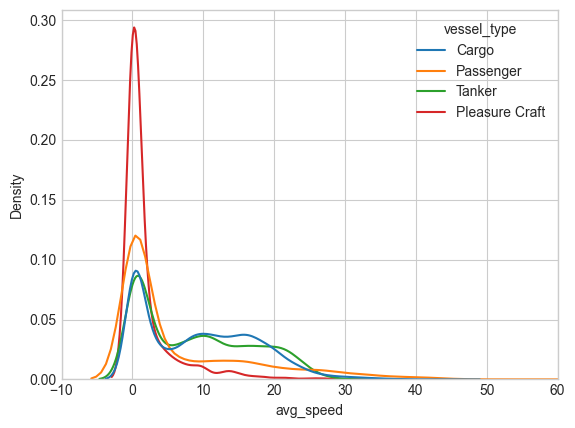

In [91]:
g = sns.kdeplot(
    data = df[df['vessel_type'].isin(['Cargo','Tanker','Passenger','Pleasure Craft'])], 
    x = 'avg_speed', 
    hue='vessel_type',
    common_norm=False 
)

g = g.set(xlim=(-10,60))
plt.show(g)

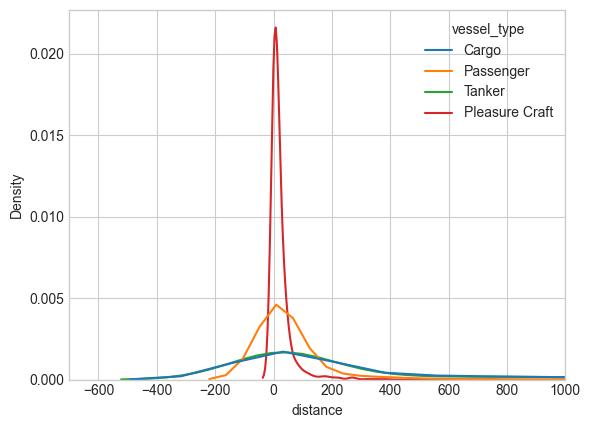

In [95]:
g = sns.kdeplot(
    data = df[df['vessel_type'].isin(['Cargo','Tanker','Passenger','Pleasure Craft'])], 
    x = 'distance', 
    hue='vessel_type',
    # log_scale=True,
    common_norm=False,
)

g = g.set(xlim=(-700,1000))
plt.show(g)

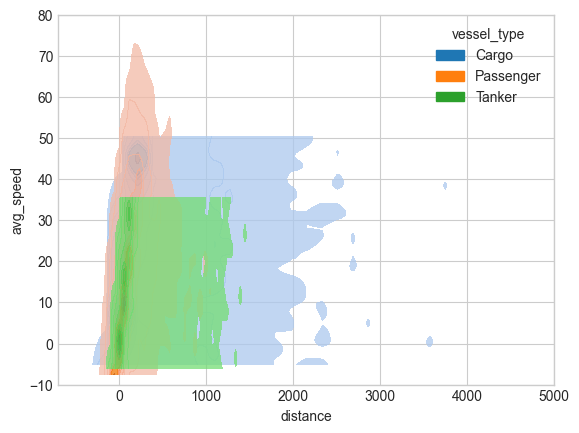

In [100]:
g = sns.kdeplot(
    data = df[df['vessel_type'].isin(['Cargo','Tanker','Passenger'])], 
    x = 'distance', 
    y = 'avg_speed',
    hue='vessel_type',
    fill = True,
    alpha = 0.75
    # common_norm=False,
)

g = g.set(xlim=(-700,5000),ylim=(-10,80))
plt.show(g)

In [146]:
df['origin_port_name'].value_counts()

KIEL            833
HÖGANÄS         662
Agnesberg       199
SIMRISHAMN      173
FREDRIKSHAMN    168
               ... 
HÄRNÖSAND         1
FÖRBY             1
RUNDVIK           1
KLINTEHAMN        1
MALMÖ             1
Name: origin_port_name, Length: 114, dtype: int64

In [119]:
#Connect to neo4j sandbox
pwd="bps12345"
graph = Graph("bolt://localhost:7687", auth=("neo4j", pwd)) 
# graph = Graph("http://knowais.datacerdas.id/:8080", auth=("neo4j", pwd))
graph

Graph('bolt://localhost:7687')

In [120]:
LOAD_DATA = True

def run_request(request,LOAD_DATA=False):
    if (LOAD_DATA):
        start_time = time.time()
        print(graph.run(request)) 
        exec_time = time.time() - start_time
        print(f'-- {exec_time} seconds --')

In [66]:
# CREATE SHIPPING

request ="""
CREATE (m:Shipping {shipping_id: toString($shipping_id)})
SET 
m.start_time = $start_time,
m.end_time = $end_time,
m.origin_port_name = toString($origin_port_name),
m.dest_port_name = toString($dest_port_name),
m.mmsi = $mmsi,
m.vessel_type = $vessel_type,
m.flag_country = $flag_country,
m.avg_speed = $avg_speed,
m.distance = $distance
"""
start_time = time.time()
count=df.shape[0]
if (LOAD_DATA):
    for index, row in df.iterrows():
        graph.run(request,
            shipping_id = row['id_shipping'],
            start_time=row['start_time'],
            end_time=row['end_time'],
            origin_port_name = row['origin_port_name'],
            dest_port_name = row['destination_port_name'],
            mmsi = row['mmsi'],
            vessel_type = row['vessel_type'],
            flag_country = row['flag_country'],
            avg_speed = row['avg_speed'],
            distance = row['distance'],
            # is_imputed = row['is_imputed_port']
        )
        if (index%100==0):
            exec_time = time.time() - start_time
            print(f'{index}/{df.shape[0]} done ... -- {exec_time} seconds --')
        
    exec_time = time.time() - start_time
    print(f' ... End ... -- {exec_time} seconds --')   

0/23380 done ... -- 0.05013084411621094 seconds --
100/23380 done ... -- 1.8718440532684326 seconds --
200/23380 done ... -- 3.315366744995117 seconds --
300/23380 done ... -- 5.5598320960998535 seconds --
400/23380 done ... -- 7.389156818389893 seconds --
500/23380 done ... -- 8.912171840667725 seconds --
600/23380 done ... -- 10.381529092788696 seconds --
700/23380 done ... -- 12.019364833831787 seconds --
800/23380 done ... -- 13.328409671783447 seconds --
900/23380 done ... -- 15.409690856933594 seconds --
1000/23380 done ... -- 17.13442873954773 seconds --
1100/23380 done ... -- 18.53542709350586 seconds --
1200/23380 done ... -- 19.80421495437622 seconds --
1300/23380 done ... -- 21.470262050628662 seconds --
1400/23380 done ... -- 23.28549599647522 seconds --
1500/23380 done ... -- 25.37817907333374 seconds --
1600/23380 done ... -- 26.77924609184265 seconds --
1700/23380 done ... -- 28.08746600151062 seconds --
1800/23380 done ... -- 29.421034812927246 seconds --
1900/23380 don

In [101]:
# CREATE  Ship
request ="""
MATCH (m:Shipping)
WHERE m.mmsi IS NOT NULL
WITH m
MERGE (p:Ship {mmsi: m.mmsi, vessel_type: m.vessel_type, flag_country: m.flag_country})
MERGE (m)-[r:Of {distance: 0}]->(p);
"""    
run_request(request,LOAD_DATA)   

(No data)
-- 71.38909602165222 seconds --


In [102]:
# CREATE  OriginPort
request ="""
MATCH (m:Shipping)
WHERE m.origin_port_name IS NOT NULL
AND m.distance IS NOT NULL
WITH m
MERGE (p:Port {port_name: m.origin_port_name})
MERGE (p)-[r:Origin {distance: m.distance}]->(m);
"""    
run_request(request,LOAD_DATA)   

(No data)
-- 3.4430253505706787 seconds --


In [103]:
# CREATE  DestPort
request ="""
MATCH (m:Shipping)
WHERE m.dest_port_name IS NOT NULL
WITH m
MERGE (p:Port {port_name: m.dest_port_name})
MERGE (m)-[r:Destination {distance: m.distance}]->(p);
"""    
run_request(request,LOAD_DATA)   

(No data)
-- 5.201799154281616 seconds --


In [106]:
# add port feature

request = """
MATCH (p:Port {port_name: $name})
SET p.country_code = $country_code
SET p.lat = $lat
SET p.lon = $lon
SET p.area = $area
SET p.port_id = $id
"""
start_time = time.time()
for index, row in df_port_used.iterrows():
    graph.run(request,
        country_code = row['iso2'],
        name = row['name'],
        lat = row['lat_port'],
        lon = row['lon_port'],
        area = row['area'],
        id = row['port_id']
    )
    if (index%10==0):
        exec_time = time.time() - start_time
        print(f'{index}/{df_port_used.shape[0]} done ... -- {exec_time} seconds --')
    
exec_time = time.time() - start_time
print(f' ... End ... -- {exec_time} seconds --')   

0/1827 done ... -- 0.07025599479675293 seconds --
10/1827 done ... -- 0.29488706588745117 seconds --
20/1827 done ... -- 0.4235820770263672 seconds --
30/1827 done ... -- 0.6094698905944824 seconds --
40/1827 done ... -- 0.7244219779968262 seconds --
50/1827 done ... -- 0.926663875579834 seconds --
60/1827 done ... -- 1.194958209991455 seconds --
70/1827 done ... -- 1.4689199924468994 seconds --
80/1827 done ... -- 1.7148668766021729 seconds --
90/1827 done ... -- 1.8277430534362793 seconds --
100/1827 done ... -- 1.9907140731811523 seconds --
110/1827 done ... -- 2.1365389823913574 seconds --
120/1827 done ... -- 2.268404960632324 seconds --
130/1827 done ... -- 2.4488770961761475 seconds --
140/1827 done ... -- 2.8014941215515137 seconds --
150/1827 done ... -- 3.0110971927642822 seconds --
160/1827 done ... -- 3.300858974456787 seconds --
170/1827 done ... -- 3.486315965652466 seconds --
180/1827 done ... -- 3.8838789463043213 seconds --
190/1827 done ... -- 4.094762086868286 second

In [107]:
# CREATE  Country
request ="""
MATCH (m:Port)
WHERE m.country_code IS NOT NULL
WITH m
MERGE (p:Country {country_code: m.country_code})
MERGE (m)-[r:IsIn {distance: 0}]->(p);
"""    
run_request(request,LOAD_DATA)   

(No data)
-- 0.08325600624084473 seconds --


In [122]:
# add country feature

request = """
MATCH (p:Country {country_code: $code})
SET p.country_name = $name
SET p.continent = $continent
SET p.sub_continent = $sub_continent
"""
start_time = time.time()
for index, row in df_country.iterrows():
    graph.run(request,
        code = row['iso_alpha_2'],
        name = row['country'],
        continent = row['continent_name'],
        sub_continent = row['sub_continent_name']
    )
    if (index%10==0):
        exec_time = time.time() - start_time
        print(f'{index}/{df_country.shape[0]} done ... -- {exec_time} seconds --')
    
exec_time = time.time() - start_time
print(f' ... End ... -- {exec_time} seconds --')   

0/1827 done ... -- 0.06487822532653809 seconds --
10/1827 done ... -- 0.4107961654663086 seconds --
20/1827 done ... -- 0.8075351715087891 seconds --
30/1827 done ... -- 1.3666012287139893 seconds --
40/1827 done ... -- 2.125577211380005 seconds --
50/1827 done ... -- 2.7724201679229736 seconds --
60/1827 done ... -- 3.4852023124694824 seconds --
70/1827 done ... -- 3.8530192375183105 seconds --
80/1827 done ... -- 4.449362277984619 seconds --
90/1827 done ... -- 5.377098321914673 seconds --
100/1827 done ... -- 6.117655038833618 seconds --
110/1827 done ... -- 6.469827175140381 seconds --
120/1827 done ... -- 6.610465049743652 seconds --
130/1827 done ... -- 6.79858136177063 seconds --
140/1827 done ... -- 7.17460823059082 seconds --
150/1827 done ... -- 7.443183183670044 seconds --
160/1827 done ... -- 7.666082143783569 seconds --
170/1827 done ... -- 8.419799089431763 seconds --
180/1827 done ... -- 9.351189374923706 seconds --
190/1827 done ... -- 10.346436262130737 seconds --
200/

## Create link connection between port

In [115]:
df_port = df[df['vessel_type'].isin(['Cargo','Tanker'])].groupby(['origin_port_name','destination_port_name'])['id_shipping'].count().reset_index()
# df_port = df_country[df_country['origin_country_iso2']!="UNKNOWN"]
# df_port = df_country[df_country['destination_country_iso2']!="UNKNOWN"]
df_port

,origin_port_name,destination_port_name,id_shipping
0,Aamshite,Ain El Mraisse _El Jisr,11
1,Aamshite,Batroun,1
2,Aamshite,El Aabde,1
3,Abu Qir,Alexandria,112
4,Abu Qir,Diliskelesi,1
...,...,...,...
1874,ÖREGRUND,GRISSLEHAMN,2
1875,ÖRNSKÖLDSVIK,HUSUM,5
1876,ÖRNSKÖLDSVIK,KIEL,1
1877,ÖRNSKÖLDSVIK,SIMRISHAMN,1


In [116]:
# CREATE  port relation based on tanker/cargo shipping
request ="""
MATCH (source:Port {port_name: $origin}), (target:Port {port_name: $destination})
MERGE (source)-[r:Visit {count: $N}]->(target);
"""    

for index, row in df_port.iterrows():
    graph.run(request,
        origin = row['origin_port_name'],
        destination=row['destination_port_name'],
        N=row['id_shipping']
    )

## create link connection between country

In [113]:
df_country = df[df['vessel_type'].isin(['Cargo','Tanker'])].groupby(['origin_country_iso2','destination_country_iso2'])['id_shipping'].count().reset_index()
df_country = df_country[df_country['origin_country_iso2']!="UNKNOWN"]
df_country = df_country[df_country['destination_country_iso2']!="UNKNOWN"]
df_country

,origin_country_iso2,destination_country_iso2,id_shipping
7,bg,bg,3
8,bg,ge,1
9,bg,ro,1
10,bg,ru,1
11,bg,tr,2
...,...,...,...
136,tr,tr,5005
137,tr,ua,12
138,ua,ro,217
139,ua,tr,9


In [114]:
# CREATE  country relation based on tanker/cargo shipping
request ="""
MATCH (source:Country {country_code: $origin}), (target:Country {country_code: $destination})
MERGE (source)-[r:Visit {count: $N}]->(target);
"""    

for index, row in df_country.iterrows():
    graph.run(request,
        origin = row['origin_country_iso2'],
        destination=row['destination_country_iso2'],
        N=row['id_shipping']
    )